## <span style='background :#3FBFBF' >*******************  IMPORTS *******************</span>  

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df_train = pd.read_csv('../datasets/cleaned_train_data.csv',keep_default_na=False)
df_test = pd.read_csv('../datasets/cleaned_test_data.csv')


## <span style='background :#3FBFBF' >*******************  DATA SETUP *******************</span>  

In [22]:
pd.options.display.max_columns = 999  # Allos us to display all columns
pd.options.display.max_rows = 999  # Allos us to display all columns

df_train.columns = df_train.columns.str.lower() # column names to lower case
df_test.columns = df_test.columns.str.lower() # column names to lower case

## <span style='background :#3FBFBF' >*******************  FIRST LOOK *******************</span>  

In [23]:
df_train.shape, df_test.shape  # The differnece in # of columns should be neighborhood columns

((2051, 173), (878, 169))

In [24]:
# Double check every thing for null values

for col in df_train:                   # Starting with the df_train data
    x = df_train[col].isnull().sum()   # Check each column for nulls
    if x > 0: 
        print(f'df_train{[col]} : {x} null vals.')   # Print the column info if there are null values

for col in df_test:                   # Starting with the df_test data
    y = df_test[col].isnull().sum()   # Check each column for nulls
    if y > 0: 
        print(f'df_train{[col]} : {x} null vals.')   # Print the column info if there are null values        
        
      

In [25]:
# Check for object type columns
obj_cols = df_train.dtypes[df_train.dtypes == 'object'].index
obj_cols

Index([], dtype='object')

In [26]:
# Check for object type columns
obj_cols = df_test.dtypes[df_test.dtypes == 'object'].index
obj_cols

Index([], dtype='object')

With no Nulls, and no object (string) data, we can look at distributions, correlations to the target, and outliers.
### First, we're going to look at the correlations to saleprice.
There is a lot of data here, and a limited amount of time, so we want to 
focus our efforts on the data points that we're most likely to include in 
any potention models.


In [27]:
df_train.corr()[['saleprice']].sort_values(['saleprice'], 
                                           ascending=False
                                          ).head(10)                # gives you everything corelated to apps

,saleprice
saleprice,1.000000
overall qual,0.800207
exter qual,0.712146
gr liv area,0.697038
kitchen qual,0.692336
garage area,0.649897
garage cars,0.647781
total bsmt sf,0.629303
1st flr sf,0.618486
bsmt qual,0.612188


This is going to be a SUPER long list with over 170 features to consider, and strong neagtive and positive correlations to consider.
To make this task easier, we're going to find the absolute values of our correlations, and then sort highest to lowest.
We don't care if the correlation is positive or negative, we really just care about how close it is to 1.


In [28]:
corrs = df_train.corr()[['saleprice']].abs().sort_values(['saleprice'], ascending=False)  #.index.tolist() 
# gives you every feature and its corelation to salesprice in terms of absolute value, both positive and negative
corrs.rename(columns={'saleprice':'corr_1'},inplace=True)
# calling the column corr_1 because we're going to try to deal with outliers and then retake the correlation 

corrs#.head(11)
#with help from https://www.marsja.se/renaming-columns-in-pandas-dataframe/#:~:text=So%20how%20do%20you%20change,columns%20%3D%20list_of_new_names%20.


,corr_1
saleprice,1.000000
overall qual,0.800207
exter qual,0.712146
gr liv area,0.697038
kitchen qual,0.692336
garage area,0.649897
garage cars,0.647781
total bsmt sf,0.629303
1st flr sf,0.618486
bsmt qual,0.612188


In [29]:
## df_train.corr()[['saleprice']].abs().sort_values(['saleprice'], ascending=False).index.tolist() 

### Next, we're just going to plot those correlations and look for potential outliers


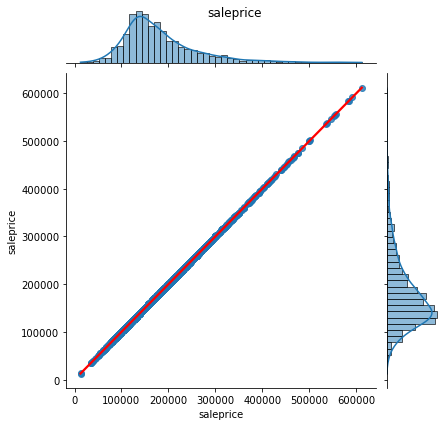

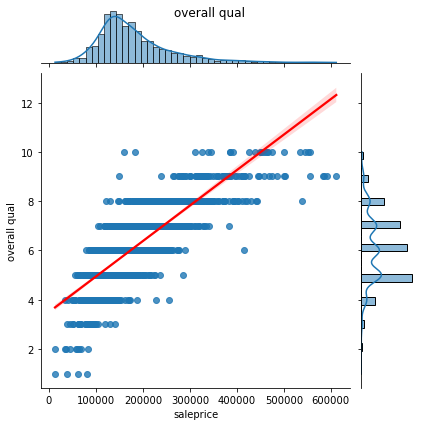

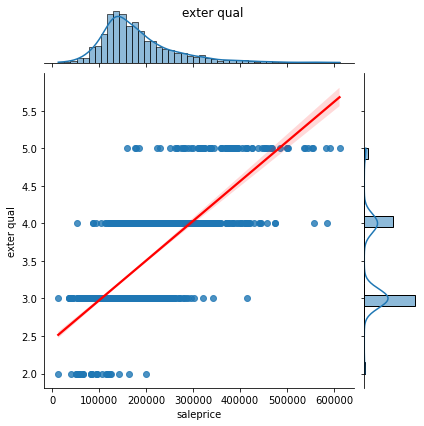

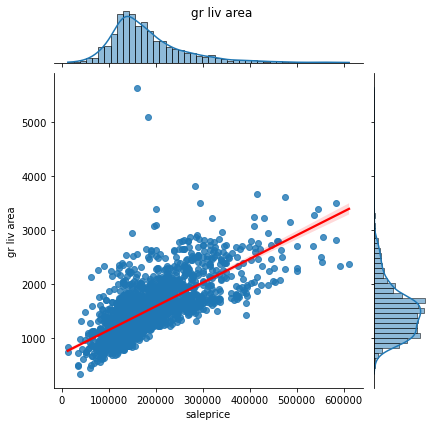

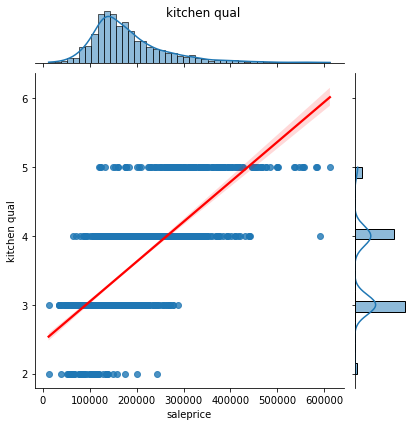

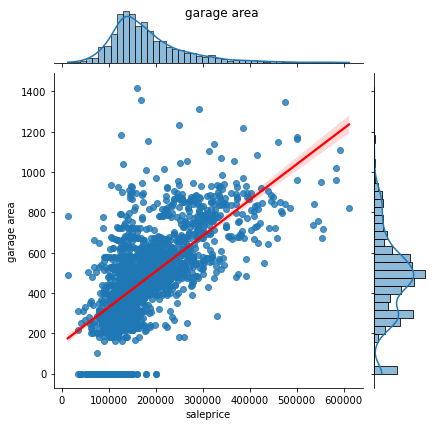

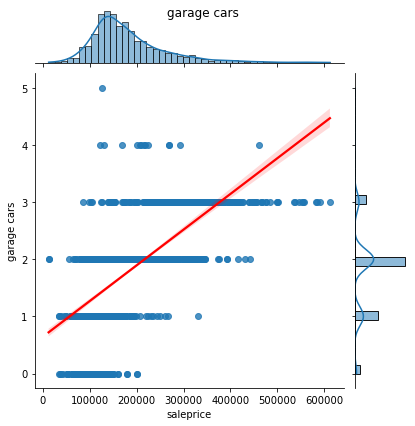

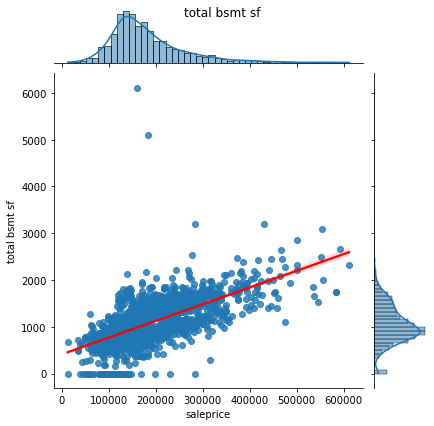

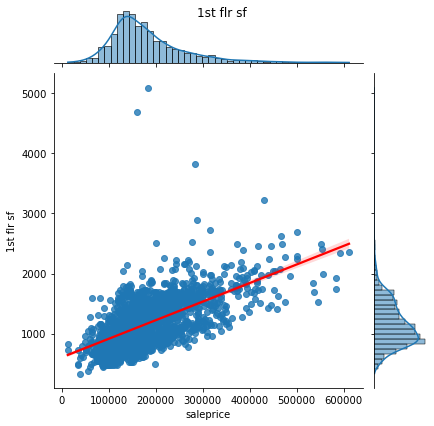

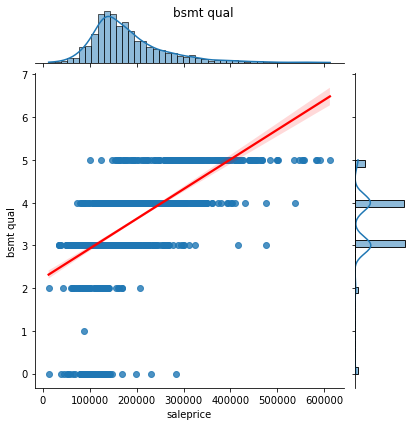

In [30]:
for feature in corrs.head(10).iterrows():
    #print(feature[0])
    #sns.jointplot(data=df_train, x="saleprice", y=feature[0], kind="reg", color='r')
    p = sns.jointplot(data=df_train, x="saleprice", y=feature[0], kind='reg', 
              line_kws={"color": "red"});
    p.fig.suptitle(feature[0])

# with help from 
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
# https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot


Based on the charts above, it looks like there maybe some outliers in:

1. Garage Area
2. Garage Cars
3. Total Bsmt Sq Ft
4. 1st Flr Sq Ft

But within these other features, some odd balls also stick out

1. Overall Qual : Looks like a 10 with a low sales price
2. Overall Qual Looks like a 6 with a high sales price
3. Ext Qual: Looks like some 3s and 4s with high sales prices
4. Gr Liv Area: Some with high sq ft but low sales price
5. Kitchen Qual: One 4 with a high sales price
6. Bsmt Qual: Looks like some 3s and 4s with high sales prices

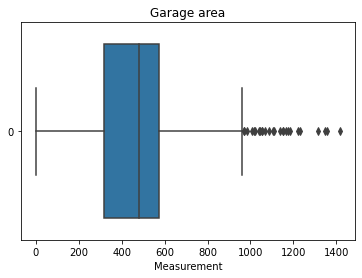

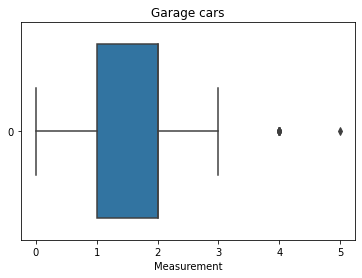

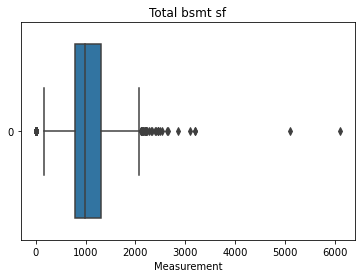

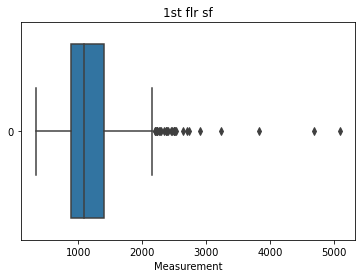

In [31]:
outliers = ['garage area','garage cars','total bsmt sf','1st flr sf']   # put outliers in a list

for i,feature in enumerate(outliers):   # for each item in the list                    
    plt.figure(i)                       # creat the new fig
    sns.boxplot(data=df_train[feature], # create the plot
            orient='h')
    plt.title(feature.capitalize())     # set the title
    plt.xlabel('Measurement');          # set the lable

# with help from https://stackoverflow.com/questions/41325160/seaborn-plots-in-a-loop

Based on the charts above, garage cars has obvious outliers, total basement sq ft has a bunch but 5000 and 6000 appear to be extremes.  1st flr sf also has some extremes over about 4500.  Garage area has plenty of outliers but nothing as obviously extreme as the other three. Let's look at those three features first.  For garage cars, we want to see anything more than 3. For total basement sq ft, we want to see anything more than 4500. For 1st flr sf, we want to see anything over 3500.

In [32]:
def find_outliers(col):
    q1 = np.percentile(df_train[col], 25)  # Find the first quartile
    q3 = np.percentile(df_train[col], 75)  # Find the third quartile
    iqr = q3 - q1                          # Calculate the IQR
             # The normal lower limit is Q1 – (1.5 * IQR)
             # THe normal upper limit as Q3 + (1.5 * IQR)
    lowerbound = q1 - 1.5 * iqr            # lower bound 
    upperbound = q3 + 1.5 * iqr            # Upper bound 
    
    return f'For {col}: below {lowerbound} or above {upperbound} is an outlier.'

for feature in corrs.head(10).iterrows():
    print(find_outliers(feature[0]))

For saleprice: below 3562.5 or above 340262.5 is an outlier.
For overall qual: below 2.0 or above 10.0 is an outlier.
For exter qual: below 1.5 or above 5.5 is an outlier.
For gr liv area: below 229.75 or above 2627.75 is an outlier.
For kitchen qual: below 1.5 or above 5.5 is an outlier.
For garage area: below -66.5 or above 961.5 is an outlier.
For garage cars: below -0.5 or above 3.5 is an outlier.
For total bsmt sf: below 4.75 or above 2106.75 is an outlier.
For 1st flr sf: below 91.25 or above 2193.25 is an outlier.
For bsmt qual: below 1.5 or above 5.5 is an outlier.


In [33]:
df_train.loc[df_train['garage cars'] > 3.5]
# this looks like a large number of outliers,  we're going to stick with removing just those over 4

,1st flr sf,2nd flr sf,3ssn porch,bedroom abvgr,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage yr blt,gr liv area,half bath,heating,heating qc,id,kitchen abvgr,kitchen qual,land slope,lot area,lot frontage,lot shape,low qual fin sf,ms subclass,mas vnr area,misc val,mo sold,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,conditions,exteriors,alley_grvl,alley_na,alley_pave,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,garage type_0,garage type_1,garage type_2,garage type_3,garage type_4,garage type_5,garage type_6,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside,ms zoning_a (agr),ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,mas vnr type_0,mas vnr type_1,mas vnr type_3,mas vnr type_4,misc feature_0,misc feature_1,misc feature_2,misc feature_3,misc feature_4,misc feature_5,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,roof matl_clytile,roof matl_compshg,roof matl_membran,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_wd
194,1338,1296,0,6,3,1,1.0,1.0,3,748.0,500.0,0.0,2,1,1,0,1,5,0,3,3,7,10,0,0,0,2,8,968.0,4.0,3,1,3,1969.0,2634,2,5,3,670,2,3,3,11643,91.000000,4,0,90,368.0,0,8,0,5,5,535402330,2,0,0,200000,0,1,12,1248.0,4,0,1969,1969,2009,0,0,1,0,0,1,17,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
289,1344,0,0,2,4,4,2.0,0.0,4,35.0,1309.0,0.0,6,1,1,1,1,5,0,4,3,13,14,0,0,0,2,8,784.0,4.0,3,3,3,1997.0,1344,0,5,5,1590,2,3,3,7060,78.000000,4,0,90,200.0,0,11,0,5,7,923202015,2,0,0,206300,0,1,8,1344.0,4,0,1997,1998,2008,0,0,1,0,0,2,27,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
332,1632,1158,0,4,3,4,1.0,0.0,5,538.0,1082.0,0.0,6,1,1,2,1,5,0,3,5,14,16,0,5,1,2,8,1150.0,4.0,3,3,3,2005.0,2790,1,5,5,1060,1,5,3,12539,96.000000,4,0,60,468.0,0,6,200,5,10,528118090,2,0,0,460000,192,1,10,1620.0,4,30,2005,2006,2008,1,0,0,0,0,3,30,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
337,1622,0,0,3,3,3,1.0,0.0,3,90.0,1159.0,0.0,4,1,1,1,1,5,0,4,3,7,10,0,3,1,1,8,1356.0,4.0,3,3,3,1975.0,1

In [34]:
df_train.loc[df_train['total bsmt sf'] > 2100]
# This is a lot of outliers, we're going to stick with removing just those over 4500

,1st flr sf,2nd flr sf,3ssn porch,bedroom abvgr,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage yr blt,gr liv area,half bath,heating,heating qc,id,kitchen abvgr,kitchen qual,land slope,lot area,lot frontage,lot shape,low qual fin sf,ms subclass,mas vnr area,misc val,mo sold,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,conditions,exteriors,alley_grvl,alley_na,alley_pave,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,garage type_0,garage type_1,garage type_2,garage type_3,garage type_4,garage type_5,garage type_6,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside,ms zoning_a (agr),ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,mas vnr type_0,mas vnr type_1,mas vnr type_3,mas vnr type_4,misc feature_0,misc feature_1,misc feature_2,misc feature_3,misc feature_4,misc feature_5,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,roof matl_clytile,roof matl_compshg,roof matl_membran,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_wd
30,2524,0,0,4,3,1,1.0,0.0,4,1420.0,1104.0,0.0,5,1,1,2,1,5,0,3,4,12,13,3,4,1,2,8,542.0,2.0,3,3,3,1981.0,2524,1,5,3,380,1,4,3,9600,80.00000,4,0,20,0.0,0,7,120,5,8,527355150,2,0,0,278000,0,1,9,2524.0,4,474,1981,1981,2009,1,0,0,0,0,3,25,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
81,2234,0,0,1,3,1,1.0,0.0,5,312.0,1904.0,0.0,6,1,1,1,1,5,0,3,5,13,14,0,4,1,2,8,1166.0,3.0,3,3,3,2009.0,2234,0,5,5,367,1,5,3,17423,63.00000,3,0,20,748.0,0,7,60,5,9,527214050,2,0,0,501837,0,1,9,2216.0,4,0,2008,2009,2009,1,0,0,0,0,2,27,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,2392,0,0,3,3,4,0.0,0.0,5,2336.0,56.0,0.0,6,1,1,1,1,5,0,3,5,13,14,0,5,1,2,8,968.0,3.0,3,3,3,2003.0,2392,0,5,5,448,1,5,3,13472,103.00000,4,0,20,922.0,0,6,105,5,10,528166060,2,0,0,386250,0,1,8,2392.0,4,248,2003,2003,2009,1,0,0,0,0,2,27,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
286,2036,0,0,3,3,4,1.0,0.0,5,432.0,1758.0,0.0,6,1,1,1,1,5,0,3,5,14,16,0,5,1,2,8,780.0,3.0,3,3,3,2008.0,2036,0,5,5

In [35]:
df_train.loc[df_train['1st flr sf'] > 2193]
# Also a lot of outliers, going to stick with 3500

,1st flr sf,2nd flr sf,3ssn porch,bedroom abvgr,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage yr blt,gr liv area,half bath,heating,heating qc,id,kitchen abvgr,kitchen qual,land slope,lot area,lot frontage,lot shape,low qual fin sf,ms subclass,mas vnr area,misc val,mo sold,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,conditions,exteriors,alley_grvl,alley_na,alley_pave,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,garage type_0,garage type_1,garage type_2,garage type_3,garage type_4,garage type_5,garage type_6,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside,ms zoning_a (agr),ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,mas vnr type_0,mas vnr type_1,mas vnr type_3,mas vnr type_4,misc feature_0,misc feature_1,misc feature_2,misc feature_3,misc feature_4,misc feature_5,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,roof matl_clytile,roof matl_compshg,roof matl_membran,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_wd
30,2524,0,0,4,3,1,1.0,0.0,4,1420.0,1104.0,0.0,5,1,1,2,1,5,0,3,4,12,13,3,4,1,2,8,542.0,2.0,3,3,3,1981.0,2524,1,5,3,380,1,4,3,9600,80.000000,4,0,20,0.0,0,7,120,5,8,527355150,2,0,0,278000,0,1,9,2524.0,4,474,1981,1981,2009,1,0,0,0,0,3,25,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
81,2234,0,0,1,3,1,1.0,0.0,5,312.0,1904.0,0.0,6,1,1,1,1,5,0,3,5,13,14,0,4,1,2,8,1166.0,3.0,3,3,3,2009.0,2234,0,5,5,367,1,5,3,17423,63.000000,3,0,20,748.0,0,7,60,5,9,527214050,2,0,0,501837,0,1,9,2216.0,4,0,2008,2009,2009,1,0,0,0,0,2,27,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,2392,0,0,3,3,4,0.0,0.0,5,2336.0,56.0,0.0,6,1,1,1,1,5,0,3,5,13,14,0,5,1,2,8,968.0,3.0,3,3,3,2003.0,2392,0,5,5,448,1,5,3,13472,103.000000,4,0,20,922.0,0,6,105,5,10,528166060,2,0,0,386250,0,1,8,2392.0,4,248,2003,2003,2009,1,0,0,0,0,2,27,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
328,3228,0,0,4,3,1,1.0,0.0,4,1969.0,1231.0,0.0,6,1,1,1,1,5,291,3,4,12,13,0,4,1,3,8,546.0,2.0,3,2,3,1992.0,3228

In [36]:
df_train.drop(df_train.index[df_train['garage cars'] > 4], inplace=True)

In [37]:
df_train.drop(df_train.index[df_train['total bsmt sf'] > 4500], inplace=True)

In [38]:
df_train.drop(df_train.index[df_train['1st flr sf'] > 3500], inplace=True)

In [39]:
df_train.corr()[['saleprice']].sort_values(['saleprice'], 
                                           ascending=False
                                          ).head(10)                # gives you everything corelated to apps

,saleprice
saleprice,1.000000
overall qual,0.804360
gr liv area,0.720682
exter qual,0.715800
kitchen qual,0.693929
total bsmt sf,0.668048
garage area,0.657966
garage cars,0.652663
1st flr sf,0.651947
bsmt qual,0.618155


In [40]:
df_train.columns = df_train.columns.str.lower() # column names to lower case


df_train.to_csv('../datasets/cleaned_train_to_model.csv', index=False)